In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("clean_data.csv")
df

,camera_id,vehicle_no,timestamp,cars_in_parking
0,1,MHUN7063,2024-09-12 05:00:00,1
1,1,MHMY1867,2024-09-12 05:00:00,2
2,1,MHZF8417,2024-09-12 05:00:00,3
3,1,MHFU6425,2024-09-12 05:00:00,4
4,1,MHHB4038,2024-09-12 05:00:00,5
...,...,...,...,...
104759,2,MHEV1001,2024-11-14 00:00:00,4
104760,2,MHGL7893,2024-11-14 00:00:00,3
104761,2,MHQG5264,2024-11-14 00:00:00,2
104762,2,MHBB9719,2024-11-14 00:00:00,1


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date

entries_df = df[df['camera_id'] == 1]

vehicles_per_day = entries_df.groupby('date')['vehicle_no'].nunique()
vehicles_per_day

date
2024-09-12     872
2024-09-13     798
2024-09-14     856
2024-09-15    1065
2024-09-16     836
              ... 
2024-11-09     848
2024-11-10     936
2024-11-11     817
2024-11-12     796
2024-11-13     770
Name: vehicle_no, Length: 63, dtype: int64

<Axes: xlabel='date'>

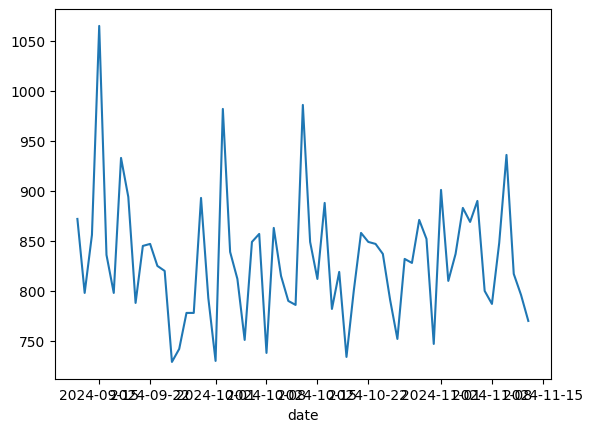

In [4]:
vehicles_per_day.plot(kind='line')

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

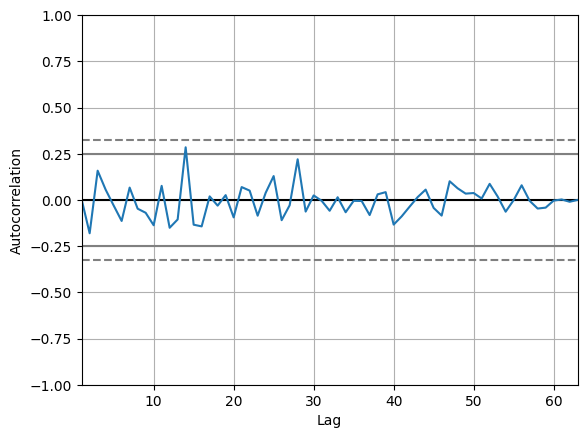

In [5]:

import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(vehicles_per_day)


In [6]:


from sklearn.metrics import mean_squared_error

X = vehicles_per_day.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]




history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(history, order=(1,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
print(mean_squared_error(test, predictions))

history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(history, order=(2,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
print(mean_squared_error(test, predictions))

history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(history, order=(2,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
print(mean_squared_error(test, predictions))
                




C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2774.8160371850686
2516.141295665188


C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:

2623.634910088636


In [7]:

import numpy as np
from sklearn.linear_model import LinearRegression

vehicles_per_day = vehicles_per_day.reset_index()
vehicles_per_day['day_of_week'] = vehicles_per_day['date'].apply(lambda x: x.weekday())
vehicles_per_day['day_of_week'] = vehicles_per_day['day_of_week'].astype('category')

vehicles_per_day['day_of_week'] = vehicles_per_day['day_of_week'].cat.codes

X = vehicles_per_day[['day_of_week']]
y = vehicles_per_day['vehicle_no']

size = int(len(X) * 0.8)
train_X, test_X = X[0:size], X[size:len(X)]
train_y, test_y = y[0:size], y[size:len(y)]

model = LinearRegression()
model.fit(train_X, train_y)
predictions = model.predict(test_X)

print(mean_squared_error(test_y, predictions))


2478.50637936757
